1 Regularization.

Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 
<br>1.1.1. Create a visualization of the coefficient trajectories
<br>1.1.2. Comment on which are the final three predictors that remain in the model
<br>1.1.3. Use cross-validation to find the optimal value of the regularization penalty
<br>1.1.4. How many predictors are left in that model?

1.2 Repeat with Ridge Regression. 
<br>1.2.1 Visualize the coefficient trajectories
<br>1.2.2 Use cross-validation to find the optimal value of the regularization penalty

2 Short Answer. 
<br>2.1 Explain in your own words the bias-variance tradeoff
<br>2.2 What role does regularization play in this tradeoff? 
<br>2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\Danielle\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###Problem 1
###part 1

In [3]:
##Prolem 1
csvFile="C:/Users/Danielle/Documents/Fall 2018/deep learning/Hitters.csv" 
hitters=pd.read_csv(csvFile,sep=',',encoding='latin1')
#hitters.describe()
hitters = hitters.dropna()
LAS=hitters._get_numeric_data()
X=LAS.drop(['Salary'],axis=1)
#X_stand = StandardScaler().fit_transform(X)
Y=LAS['Salary']


(0.0044668359215096348,
 223872.11385683378,
 -10.51547141746585,
 8.611603105647454)

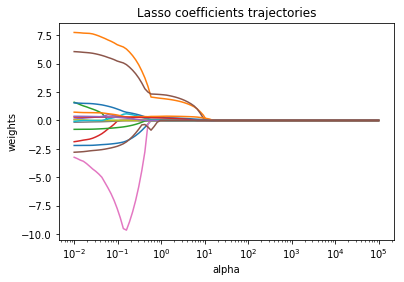

In [15]:
###part 1.1
alphas  = 10**np.linspace(5,-2,100)

lasso = Lasso(max_iter=10000,normalize = True)
l_coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    l_coefs.append(lasso.coef_)


ax1 = plt.gca()
ax1.plot(alphas, l_coefs)
ax1.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients trajectories')
plt.axis('tight')

In [16]:
###part 1.2
for c in l_coefs:
    if sum(c!= 0) ==3:
        print(X.columns[c!=0])

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')


In [18]:
###part 1.3
test_size = 0.30
seed = 404
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=test_size, random_state=seed)
lassocv = LassoCV(cv=10, max_iter=100000,normalize = True)
lassocv.fit(X_train, Y_train)

print("The best optimal value for Lasso is", lassocv.alpha_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, Y)

pd.Series(lasso.coef_, index=X.columns)

The best optimal value for Lasso is 0.316671247347


AtBat     -1.069911
Hits       4.782382
HmRun     -0.000000
Runs       0.000000
RBI        0.000000
Walks      3.644984
Years     -5.533848
CAtBat    -0.000000
CHits      0.000000
CHmRun     0.346406
CRuns      0.477718
CRBI       0.337092
CWalks    -0.236074
PutOuts    0.263238
Assists    0.059314
Errors    -0.689365
dtype: float64

In part 1.4, there are 11 predictors in the model. 


###part 1.2

(0.0044668359215096348,
 223872.11385683378,
 -11.304849552337323,
 6.5249429872028557)

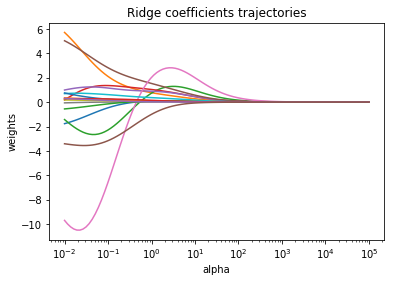

In [20]:
###part 1.2.1
ridge = Ridge(normalize = True)
r_coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    r_coefs.append(ridge.coef_)
    
ax2 = plt.gca()
ax2.plot(alphas, r_coefs)
ax2.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients trajectories')
plt.axis('tight')

In [22]:
###part 1.2.2

ridgecv=  RidgeCV(cv=10,normalize = True)
ridgecv.fit(X_train,  Y_train)
print("The best optimal value for Ridge is", ridgecv.alpha_)

ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X, Y)

pd.Series(ridge.coef_, index=X.columns)

The best optimal value for Ridge is 10.0


AtBat      0.069921
Hits       0.274156
HmRun      0.951045
Runs       0.449675
RBI        0.457258
Walks      0.572804
Years      1.998412
CAtBat     0.005877
CHits      0.022242
CHmRun     0.166005
CRuns      0.044649
CRBI       0.046078
CWalks     0.046315
PutOuts    0.035902
Assists    0.005472
Errors    -0.070350
dtype: float64

###Problem 2
###part 1
<br>In the reality, we hardly to get a model with both low bias and low variance, since we try to use sample data to estimate the real data.If we try to keep the accuracy of the training sample data, the bias will decrease, but the model is more flexible with higher variance. It may cause overfitting and the model may have poor performace with real data. On the other hand, If we try to create a more stable model, the variance will decrease with bias increase. It maycause underfitting. So we need to have a balance with bias and variance when we build a model, and choose which is more inportant in a certain situation.
<br>
###part 2
<br>Regularization can come handy when our model is overfitting. regularization will add a norm to limit the range of coefficient estimates that we can select, which increase the stability of model with bias increase, and reduce the variance.
<br>
###part 3
<br>
<br>
In the regularization model, larger alpha will result smaller coefficients which means a higher bias. When alpha equals to 0, the lasso and ridge regression will be cose to the least squares which has low bias, and when alpha is large enough, it gives the null model which all coefficient estimates equal to around zero which has high bias.